## Kanalentzerrung mit RBF Netzwerken

In [603]:
import numpy as np
import random
import matplotlib.pyplot as plt
import string
import binascii

%matplotlib notebook

Definiere ein Eingangssignal und einen nichtlinearen Kanal


Variante 1: Der Kanal ist ein statisches System, durch Rauschen gestört

$y(k) = 0.9 x(k) + 0.1 x^2(k) -0.3 x^3(k) + n(k)$

Das Eingangssignal ist eine zufällige Folge binärer Werte $ [+1,-1] $

Zur Erinnerung: Die Entzerrung versucht, das Eingangssignal (zu übertragen) nach Durchgang durch den Kanal wiederherzustellen


In [618]:
n_message = 100
# Erzeuge eine Folge zufälliger Werte zur Übertragung

lower_upper_alphabet = string.ascii_letters

training_message = []
training_text = ''

for k in range(n_message):
    training_text += random.choice(lower_upper_alphabet)

training_message = bin(int.from_bytes(training_text.encode(), 'big'))

n_iter = len(training_message)

training_bits = np.zeros(n_iter)

for k in range(n_iter):
    if training_message[k] == '1':
        training_bits[k] = 1.0
    else:
        training_bits[k] = -1.0

Anwendung des Übertragungskanals

In [619]:
noise = np.random.normal(0,0.1,n_iter)
x = training_bits
y = np.zeros(n_iter)

for k in range(n_iter):
    y[k] = 0.9 * x[k] + 0.1 * x[k]**2 + 0.3 * x[k]**3 + noise[k]

In [620]:
import sklearn.svm as skm

In [621]:
phi = x
y = np.reshape(y,(-1,1))

In [622]:
clf = skm.SVR(kernel='rbf', epsilon = 0, gamma = 10)
clf.fit(y, phi)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0, gamma=10,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [623]:
training_received = clf.predict(y)

message_received = ''

for k in range(n_iter):
    if training_received[k] > 0.0:
        message_received += '1'
    elif training_received[k] < -0.0:
        message_received += '0'

n = int(message_received, 2)
#binascii.unhexlify('%x' % n)

In [624]:
biterror = 0
for k in range(2,n_iter):
    if message_received[k] != training_message[k]:
        biterror +=1
        
BER = biterror/n_iter

<IPython.core.display.Javascript object>


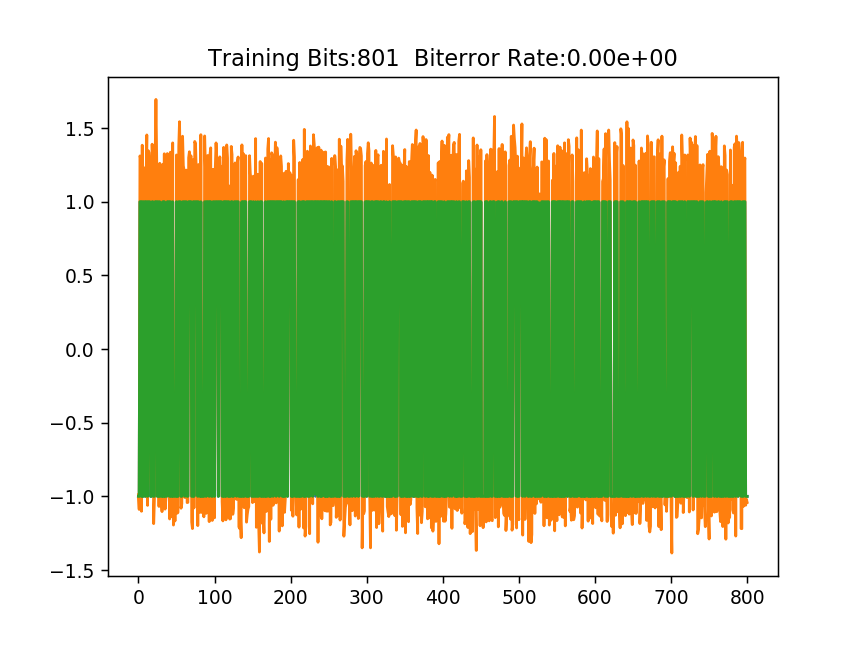

Text(0.5, 1.0, 'Training Bits:801  Biterror Rate:0.00e+00')

In [625]:
plt.figure()
plt.plot(phi)
plt.plot(y)
plt.plot(training_received)
plt.title('Training Bits:' +str(n_iter)+ '  Biterror Rate:'+str('{:1.2e}'.format(BER)))

Test: generiere eine Nachricht

In [626]:
# test_text = 'Hello World!'

n_message = 1000
# Erzeuge eine Folge zufälliger Werte zur Übertragung

lower_upper_alphabet = string.ascii_letters

test_message = []
test_text = ''

for k in range(n_message):
    test_text += random.choice(lower_upper_alphabet)


test_message = bin(int.from_bytes(test_text.encode(), 'big'))

n_iter = len(test_message)

test_bits = np.zeros(n_iter)

for k in range(n_iter):
    if test_message[k] == '1':
        test_bits[k] = 1.0
    else:
        test_bits[k] = -1.0

Übertragung durch den Kanal

In [627]:
noise = np.random.normal(0,0.1,n_iter)
x = test_bits
y = np.zeros(n_iter)

for k in range(n_iter):
    y[k] = 0.9 * x[k] + 0.1 * x[k]**2 + 0.3 * x[k]**3 + noise[k]

Entzerrung

In [628]:
y = np.reshape(y,(-1,1))
test_received_eq = clf.predict(y)

message_received_eq = ''

for k in range(n_iter):
    if test_received_eq[k] > 0:
        message_received_eq += '1'
    elif test_received_eq[k] < 0:
        message_received_eq += '0'
    else:
        message_received_eq += ''

n = int(message_received_eq, 2)
binascii.unhexlify('%x' % n)

b'uVEGrUNQkZnuaLpnQFJSxUIHmltOyJUnEFvGCiArmBZZEcyPCoGldIUlSVtRFZAONHnyZoooklunfwVlADqhZlVuyLOEfvotcWFMfWujaYjpiwdDadJgapWtGAUmeLhGCZhusqelfVGMYfbAButTbdSFjeQAGTYBRumydUxeRHolXymxOoMZQpjRYGHPoYbkaEagedCPDgmSduBrxLGQmxcFzbilnejTBUnnFhZlYgkXjKsEfYSNJhOdGtInoNasTEXcxBykWvRdRrvcfDXgYcgAGWGxwmqRisLzckRBdvIthRQMuKnuEBKOCyzmjEvPkBkVokEjsCtHVnOFueOgLBxYNeQAqoQfmdeiNLKcMUWbhfAYpBZbkReEkuuTIfaMmYgfHWqczaoXNXKaJhyqhLWClBhyPcHLnmGjbpTqGvQRHYuGCXDRHPHSTNTqKlHGTJCEBpZWPXBJRQwrDebbGyLwVMnChdfhLLioVGSkKzsnSzKNUPHpIubzDJPmhdJTCephdwmDfatawoGGvOEfoOAOQiysOJYogvhtxqjHovBllSoYyyFbDNGhjJBXqYqdEEGyArNXTPqzyCyZXLIlnvPzWhlIaThxcjIKsuLLIDiYmbwmFaCYbficjuOOhfzyTvoMRYEhLflHudxuiTCgFgQwLYznIRifSkPZQgMjjISylYbiCfSHykMoDvumefyUUItbiKRqkMksTOixhEhMpByBIMYECHLDUAUROLwKVgoOifgxYRvxBnswYvzQKRHNxMAJmxibERsoaKZTUxRizhHELLEWCUxaGOHzTtHZuxtMLsjpfySbPtzdETwUNXkxLiPiEfKeduxuAOdlzTWughHlcjipLlYydrXDkzVKFcaSBSFJmbZkzuAahQuhrGLeZndyrVBxDsroNLdQGPhcNEDRVKFlgzIUOpPnpjpYNgXKrwsXoCZGCpdTZtbhAPgWXtOKVglOKcAuQZfgOsgyboYwKHuytCMYHcOcLR

In [629]:
y = np.reshape(y,(-1,1))
test_received = y

message_received = ''

for k in range(n_iter):
    if test_received[k] > 0:
        message_received += '1'
    elif test_received[k] < 0:
        message_received += '0'
    else:
        message_received += ''

n = int(message_received, 2)
binascii.unhexlify('%x' % n)

b'uVEGrUNQkZnuaLpnQFJSxUIHmltOyJUnEFvGCiArmBZZEcyPCoGldIUlSVtRFZAONHnyZoooklunfwVlADqhZlVuyLOEfvotcWFMfWujaYjpiwdDadJgapWtGAUmeLhGCZhusqelfVGMYfbAButTbdSFjeQAGTYBRumydUxeRHolXymxOoMZQpjRYGHPoYbkaEagedCPDgmSduBrxLGQmxcFzbilnejTBUnnFhZlYgkXjKsEfYSNJhOdGtInoNasTEXcxBykWvRdRrvcfDXgYcgAGWGxwmqRisLzckRBdvIthRQMuKnuEBKOCyzmjEvPkBkVokEjsCtHVnOFueOgLBxYNeQAqoQfmdeiNLKcMUWbhfAYpBZbkReEkuuTIfaMmYgfHWqczaoXNXKaJhyqhLWClBhyPcHLnmGjbpTqGvQRHYuGCXDRHPHSTNTqKlHGTJCEBpZWPXBJRQwrDebbGyLwVMnChdfhLLioVGSkKzsnSzKNUPHpIubzDJPmhdJTCephdwmDfatawoGGvOEfoOAOQiysOJYogvhtxqjHovBllSoYyyFbDNGhjJBXqYqdEEGyArNXTPqzyCyZXLIlnvPzWhlIaThxcjIKsuLLIDiYmbwmFaCYbficjuOOhfzyTvoMRYEhLflHudxuiTCgFgQwLYznIRifSkPZQgMjjISylYbiCfSHykMoDvumefyUUItbiKRqkMksTOixhEhMpByBIMYECHLDUAUROLwKVgoOifgxYRvxBnswYvzQKRHNxMAJmxibERsoaKZTUxRizhHELLEWCUxaGOHzTtHZuxtMLsjpfySbPtzdETwUNXkxLiPiEfKeduxuAOdlzTWughHlcjipLlYydrXDkzVKFcaSBSFJmbZkzuAahQuhrGLeZndyrVBxDsroNLdQGPhcNEDRVKFlgzIUOpPnpjpYNgXKrwsXoCZGCpdTZtbhAPgWXtOKVglOKcAuQZfgOsgyboYwKHuytCMYHcOcLR

In [630]:
biterror = 0
biterror_eq = 0
for k in range(2,n_iter):
    if message_received_eq[k] != test_message[k]:
        biterror_eq +=1
    if message_received[k] != test_message[k]:
        biterror +=1

BERQ = biterror_eq/n_iter
BER = biterror/n_iter

<IPython.core.display.Javascript object>


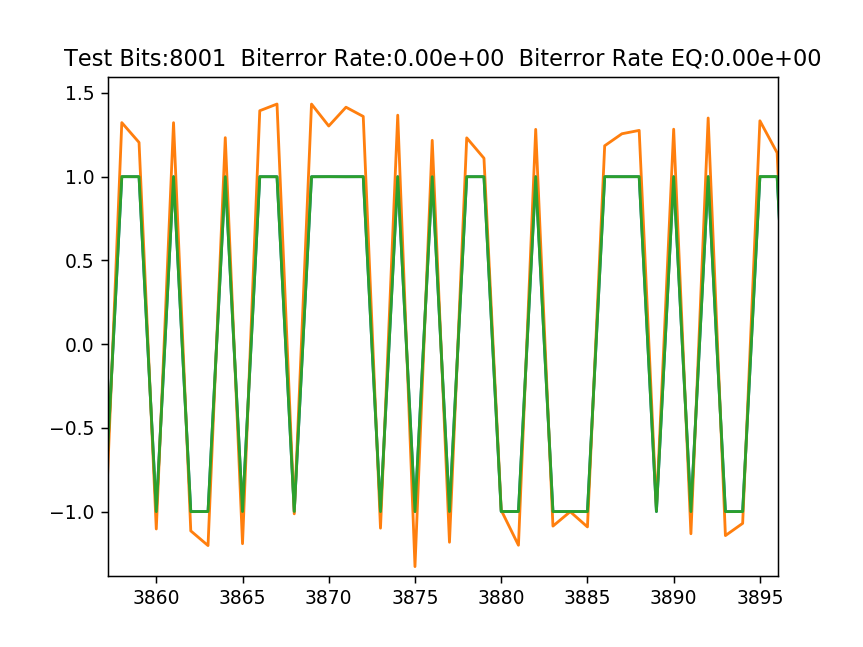

Text(0.5, 1.0, 'Test Bits:8001  Biterror Rate:0.00e+00  Biterror Rate EQ:0.00e+00')

In [631]:
plt.figure()
plt.plot(x)
plt.plot(test_received)
plt.plot(test_received_eq)
plt.title('Test Bits:' +str(n_iter)+ '  Biterror Rate:'+str('{:1.2e}'.format(BER)) + '  Biterror Rate EQ:'+str('{:1.2e}'.format(BERQ)))

'0b10010000110010101101100011011000110111100100000010101110110111101110010011011000110010000100001'